##### Problem Statement: Customer purchase behaviour and prediction

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#load data
df1 = pd.read_csv('./blackFriday_train.csv')
df2 = pd.read_csv('./blackFriday_test.csv')
print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
print(df2.shape)
df2.head()

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
# merge train & test dataset
df = df1.append(df2, sort = False)
df.shape

C:\Users\MohdAbdulQhavi\AppData\Local\Temp\ipykernel_27108\1898524339.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2, sort = False)


(783667, 12)

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
# drop unnecessary column
df.drop(['User_ID'], axis = 1, inplace = True) 

In [10]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
#convert the categorical data to int by using map function
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [13]:
#unique values of the age column
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df['Age'] = df['Age'].map({ '0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
# creating dummy variables
city = pd.get_dummies(df['City_Category'], drop_first = True)
city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [18]:
#concat the created dummy variables
df = pd.concat([df, city], axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
# check the null values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
#check the unique values of the columns containing NAN values
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [21]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [24]:
df.Product_Category_1.mode()

0    5
Name: Product_Category_1, dtype: int64

In [25]:
df.rename(columns = { 'Product_Category_1':'cat1', 'Product_Category_2':'cat2', 'Product_Category_3':'cat3'}, inplace = True)

In [26]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

In [27]:
# filling the NAN in the columns
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,NaN,7969.0,0,1


In [30]:
df.cat2.mode()

0    8.0
Name: cat2, dtype: float64

In [31]:
df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0])

In [32]:
df.cat3.mode()

0    16.0
Name: cat3, dtype: float64

In [33]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [34]:
# filling NAN values in the purchase with mean
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [35]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [37]:
# drop the column City_Category
df.drop('City_Category', axis = 1, inplace = True)

In [38]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [40]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
#replace the value/spl char using str
df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.str.replace('+', '') #replace + with blank

C:\Users\MohdAbdulQhavi\AppData\Local\Temp\ipykernel_27108\3722268723.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.str.replace('+', '') #replace + with blank


In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [44]:
#converting the datatypes to integer of the required columns
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [45]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

In [46]:
# creating a checkpoint
df_i = df.copy()

#drop the unnecesary column
df_i.drop('Product_ID', axis = 1, inplace = True)

In [47]:
df_i.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


c:\Users\MohdAbdulQhavi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

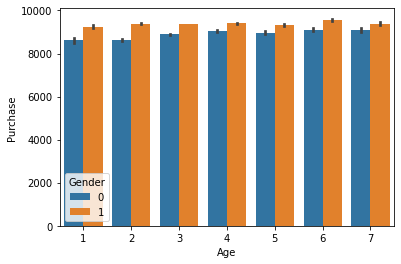

In [48]:
#plot Age vs Purchase
sns.barplot('Age', 'Purchase', hue = 'Gender', data = df_i)

c:\Users\MohdAbdulQhavi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat1', ylabel='Purchase'>

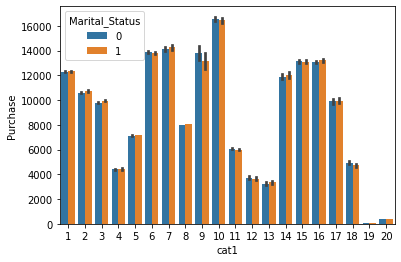

In [49]:
# plot product cat1 vs purchase
sns.barplot('cat1', 'Purchase', hue = 'Marital_Status', data = df_i)

c:\Users\MohdAbdulQhavi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat2', ylabel='Purchase'>

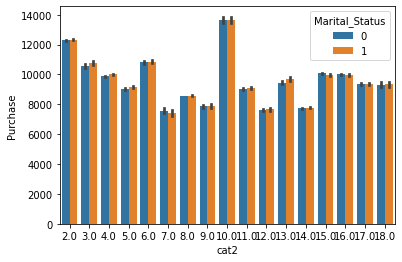

In [50]:
# plot product cat2 vs purchase
sns.barplot('cat2', 'Purchase', hue = 'Marital_Status', data = df_i)

c:\Users\MohdAbdulQhavi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat3', ylabel='Purchase'>

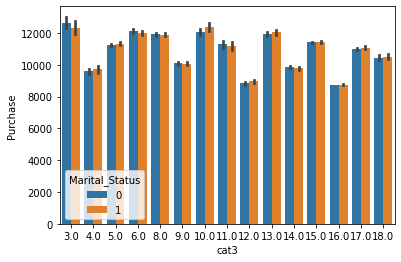

In [51]:
# plot product cat3 vs purchase
sns.barplot('cat3', 'Purchase', hue = 'Marital_Status', data = df_i)

In [53]:
# splitting the data
X = df_i.drop('Purchase', axis = 1) # drop purchase column to create features
y = df_i.Purchase # selecting purchase to create labels
print(X.shape)
print(y.shape)

(783667, 10)
(783667,)


In [55]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 10)
(587750,)
(195917, 10)
(195917,)


In [56]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
X_train

array([[ 0.57275431, -0.36745197,  0.6008837 , ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431,  1.10995723, -0.16579251, ...,  0.36937114,
         1.17365495, -0.67228678],
       ...,
       [ 0.57275431,  1.84866184,  1.67423038, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [ 0.57275431, -1.10615657, -0.93246871, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918,  1.48746045]])

In [61]:
X_test

array([[ 0.57275431, -0.36745197, -0.62579823, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [-1.74594931, -1.10615657, -0.62579823, ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657, -0.62579823, ...,  0.36937114,
        -0.85203918, -0.67228678],
       ...,
       [ 0.57275431, -1.10615657,  0.90755418, ..., -3.64065155,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657,  0.29421322, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [-1.74594931,  1.10995723,  0.6008837 , ...,  0.36937114,
        -0.85203918,  1.48746045]])